#Preprocessing

In [ ]:
pip install -U spacy

In [ ]:
!spacy download en_core_web_sm

In [3]:
import spacy
from spacy.tokenizer import Tokenizer
#Once you have a GPU-enabled installation, the best way to activate it is to call 
spacy.prefer_gpu()

# Write code here to load spaCy for french
spacy_nlp = spacy.load("en_core_web_sm")

In [4]:
spacy_nlp = spacy.load("en_core_web_sm")

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.compose import ColumnTransformer


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from scipy.stats import skew
import plotly.express as px

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train_df = pd.read_csv('/content/drive/MyDrive/Ensemble Learning/all_features.csv', index_col=0)
train_df.head()

,tweet_text,cyberbullying_type,characters per tweet,words per tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,muslim,gay,round,good,radical,bad,mkr,rape,stupid,lot
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,0,8,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,1,9,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df['not_cyberbullying'] = (train_df.cyberbullying_type == "not_cyberbullying").astype(int)
train_df = train_df.drop(['cyberbullying_type'], axis=1)
train_df.head(5)

,tweet_text,characters per tweet,words per tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,nb_len_3,...,gay,round,good,radical,bad,mkr,rape,stupid,lot,not_cyberbullying
0,"In other words #katandandre, your food was cra...",61,9,0,8,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,Why is #aussietv so white? #MKR #theblock #ImA...,115,14,1,9,1,0,0,2,1,...,0,0,0,0,0,1,0,0,0,1
2,@XochitlSuckkks a classy whore? Or more red ve...,60,9,0,7,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,"@Jason_Gio meh. :P thanks for the heads up, b...",103,18,1,16,0,0,0,2,6,...,0,0,0,0,0,0,0,0,0,1
4,@RudhoeEnglish This is an ISIS account pretend...,103,18,1,12,4,0,1,6,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
def raw_to_tokens(raw_string, spacy_nlp):
    
    # Write code for lower-casing
    string = raw_string.lower()
    
       
    # Write code to tokenize
    spacy_tokens = spacy_nlp(string)
        
    # Write code to remove punctuation tokens and create string tokens
    string_tokens = [token.orth_ for token in spacy_tokens if (token.is_punct == False) and ( token.is_stop == False)]
    
    # Write code to join the tokens back into a single string
    clean_string = " ".join(string_tokens)
    
    return clean_string

In [10]:
counter = 0
cleaned_tweets = []
for index, row in train_df.iterrows():
  cleaned_tweets.append(raw_to_tokens(row['tweet_text'], spacy_nlp))
  counter += 1
  if counter % 5000 == 0: print(counter)
    


5000
10000
15000
20000
25000
30000
35000
40000
45000


In [11]:
train_df['tweet_text'] = cleaned_tweets

In [12]:
train_df.head()

,tweet_text,characters per tweet,words per tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,nb_len_3,...,gay,round,good,radical,bad,mkr,rape,stupid,lot,not_cyberbullying
0,words katandandre food crapilicious mkr,61,9,0,8,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,aussietv white mkr theblock imacelebrityau tod...,115,14,1,9,1,0,0,2,1,...,0,0,0,0,0,1,0,0,0,1
2,@xochitlsuckkks classy whore red velvet cupcakes,60,9,0,7,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,@jason_gio meh :p thanks heads concerned ang...,103,18,1,16,0,0,0,2,6,...,0,0,0,0,0,0,0,0,0,1
4,@rudhoeenglish isis account pretending kurdish...,103,18,1,12,4,0,1,6,1,...,0,0,0,0,0,0,0,0,0,1


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Write code to convert the list of documents to list of tokens.


# Write code to create a TfidfVectorizer object
tfidf = TfidfVectorizer(max_features = 1000)


# Write code to vectorize the sample text
X_tfidf = tfidf.fit_transform(train_df['tweet_text'])


from scipy import sparse

#sparse.save_npz("/content/drive/MyDrive/Ensemble Learning/Labs/X_tfidf.npz", X_tfidf)

In [54]:
X_tfidf.shape

(47692, 1000)

# Without Imbalancing, using the combination of TF-IDF and features


In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.concat([X_tfidf_df,train_df], axis = 1)
print(df.shape)
df.head()

(47692, 1179)


,0,1,2,3,4,5,6,7,8,9,...,gay,round,good,radical,bad,mkr,rape,stupid,lot,not_cyberbullying
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_df = df
train_y = train_df[['not_cyberbullying']]
train_x = train_df.drop(['not_cyberbullying','tweet_text'], axis = 1)


In [ ]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,muslim,gay,round,good,radical,bad,mkr,rape,stupid,lot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## transforming the y column so that it works with the rest of the model
train_y = np.array(train_y)
train_y = np.transpose(train_y)
train_y = train_y.ravel()

In [ ]:
## the number of numerical features
num_features_count = 76

## extract the column names from the dataframe.
train_x_columns = list(train_x.columns)

##selecting which columns are categorical and which are numeric.
numerical_columns = train_x_columns[0:train_x.shape[1] - num_features_count]
categorical_columns = train_x_columns[:-num_features_count]

In [ ]:
## splitting the training data into a training set (80%) and a test set (20%)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=0)

In [ ]:
## set this to true if transformations should be applied
transform = False

if transform == True:
    for k in numerical_columns:
        ## these parameter specify the skewness thresholds for transformations
        ## these were changed to investigate the impact
        skew_sqrt = 2
        skew_log = 5
        temp_skew = round(skew(train_x[k]),3)
        if temp_skew > skew_sqrt:
            train_x[k] = np.sqrt(train_x[k])
            trans_skew = round(skew(np.sqrt(train_x[k])),3)
        if temp_skew > skew_log:
            train_x[k] = np.log(1+train_x[k])
            trans_skew = round(skew(np.log(1+train_x[k])),3)
        else:
            trans_skew = temp_skew
        
        print(k, temp_skew, trans_skew)

## the results of the datatransformations had a neglible impact on the final results (f1 score incr of 0.02)
## as such, the transformations have not been considered further.

In [ ]:
## selecting the features to use (numberic and categorical) - also seletcs how to fill in missing data and how to scale data
numeric_features = numerical_columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = categorical_columns

## how to handle missing data and also to use onehot encoder for categorical variables.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


## creating a preprocessor to combine the categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [ ]:
## different models to use 
def model(choice):
    
    if choice == 'AB':
        return AdaBoostClassifier(n_estimators=100, random_state=0)
    if choice == 'DT':
        return DecisionTreeClassifier(random_state=0)
    if choice == 'BG':
        return BaggingClassifier(base_estimator=SVC(),n_estimators=2, random_state=0)
    if choice == 'RF':
        return RandomForestClassifier(criterion = "gini", max_depth=25, min_samples_leaf = 1, n_estimators=300, random_state=0, class_weight = 'balanced_subsample', bootstrap=True, n_jobs=-1)
    

In [ ]:
## selecting which model to run 
choice = "RF"
MLmodel = model(choice)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[#('preprocessor', preprocessor),
                      ('classifier', MLmodel)])

## fitting the model to the train data split
fit_model = True
if fit_model:
    clf.fit(train_x, train_y)

## using the model to predict the y test values using the test data
y_pred = clf.predict(test_x)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
y_pred_train = clf.predict(train_x)
## Test scores
print(classification_report(train_y, y_pred_train))
print('F1 score:',round(f1_score(train_y,y_pred_train, average = 'macro'),3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       1.00      0.80      0.89     31780
           1       0.51      1.00      0.67      6373

    accuracy                           0.84     38153
   macro avg       0.75      0.90      0.78     38153
weighted avg       0.92      0.84      0.86     38153

F1 score: 0.782


In [ ]:
## Test scores
print(classification_report(test_y, y_pred))
print('F1 score:',round(f1_score(test_y,y_pred, average = 'macro'),3))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7967
           1       0.45      0.89      0.60      1572

    accuracy                           0.80      9539
   macro avg       0.71      0.84      0.74      9539
weighted avg       0.89      0.80      0.83      9539

F1 score: 0.735


# Using only the tfidf matrix

In [55]:
## transforming the y column so that it works with the rest of the model
y = train_df['not_cyberbullying']
y = np.array(y)
y = np.transpose(y)
y = y.ravel()

In [56]:
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=100)
print(f"Train number of observations: {Counter(y_train)}")
print(f"Test target number of observations: {Counter(y_test)}")

Train number of observations: Counter({0: 31810, 1: 6343})
Test target number of observations: Counter({0: 7937, 1: 1602})


In [57]:
def balance_test(X_train, X_test, y_train, y_test, class_weight = None, threshold=False):
    #Set the class weight
    if class_weight:    
        model = RandomForestClassifier(criterion = "gini", max_depth=25, min_samples_leaf = 1, 
                                       n_estimators=300, random_state=0, class_weight = class_weight, bootstrap=True, n_jobs=-1)
    else:
        model = RandomForestClassifier(criterion = "gini", max_depth=25, min_samples_leaf = 1, 
                                 n_estimators=300, random_state=0, class_weight = 'balanced_subsample', bootstrap=True, n_jobs=-1)
    #Train
    model.fit(X_train, y_train)

    #Test
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    # Plot metrics 
    plot_roc(y_test, y_score)
    #plt.show()
    
    plot_precision_recall(y_test, y_score)
    #plt.show()
    
    plot_cumulative_gain(y_test, y_score)
    #plt.show()
    
    plot_lift_curve(y_test, y_score)
    #plt.show()
    
    # Print a classification report
    print(classification_report(y_test,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

    print('Overall Precision score %s' % precision_score(y_test, y_pred))
    print('Overall Recall score %s' % recall_score(y_test, y_pred))
    print('Overall F1-score score %s' % f1_score(y_test, y_pred))
    print('Overall Accuracy score %s' % accuracy_score(y_test, y_pred))
        
    
    

In [27]:
!pip install scikit-plot

In [26]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      7937
           1       0.43      0.94      0.59      1602

    accuracy                           0.78      9539
   macro avg       0.71      0.84      0.72      9539
weighted avg       0.89      0.78      0.80      9539



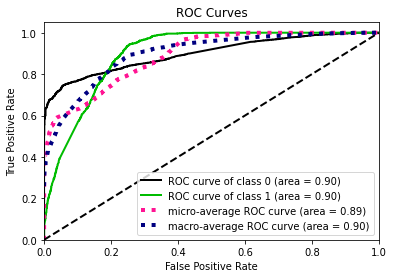

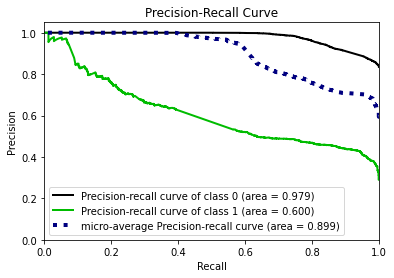

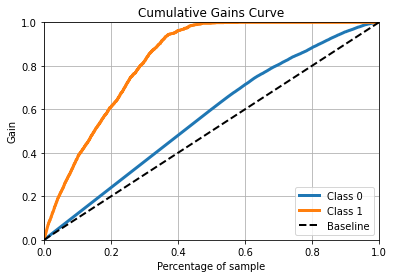

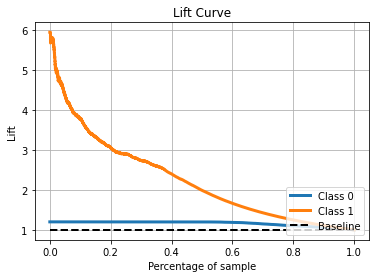

In [58]:
#Performance of imbalanced dataset

roc_auc_imb,fpr_imb,tpr_imb, _ = balance_test(X_train, X_test, y_train, y_test)

In [59]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=30)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
print(f"Trainset number of observations: {Counter(y_over)}")
print(f"Test set target number of observations: {Counter(y_test)}")

Trainset number of observations: Counter({0: 31810, 1: 31810})
Test set target number of observations: Counter({0: 7937, 1: 1602})


              precision    recall  f1-score   support

           0       0.99      0.74      0.85      7937
           1       0.42      0.95      0.59      1602

    accuracy                           0.78      9539
   macro avg       0.70      0.84      0.72      9539
weighted avg       0.89      0.78      0.80      9539



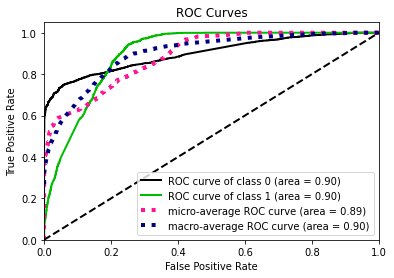

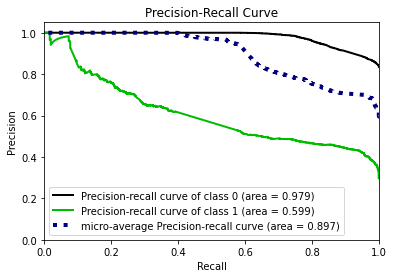

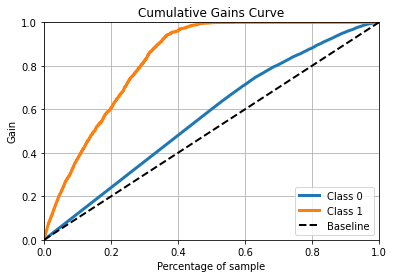

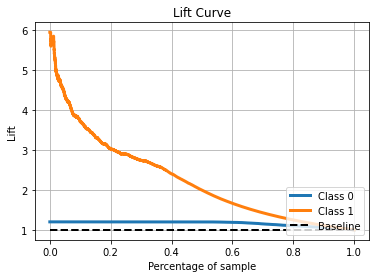

In [60]:
roc_auc_over,fpr_over,tpr_over, _ = balance_test(X_over, X_test, y_over, y_test)

In [61]:
#undersample the big dataset 
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
print(f"Trainset number of observations: {Counter(y_under)}")
print(f"Test set target number of observations: {Counter(y_test)}")

Trainset number of observations: Counter({0: 6343, 1: 6343})
Test set target number of observations: Counter({0: 7937, 1: 1602})


              precision    recall  f1-score   support

           0       0.99      0.73      0.84      7937
           1       0.42      0.96      0.58      1602

    accuracy                           0.77      9539
   macro avg       0.70      0.84      0.71      9539
weighted avg       0.89      0.77      0.79      9539



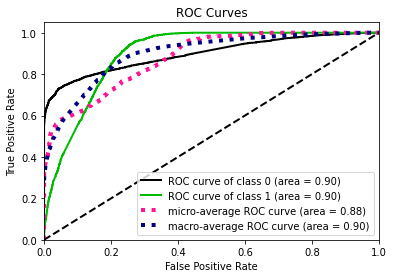

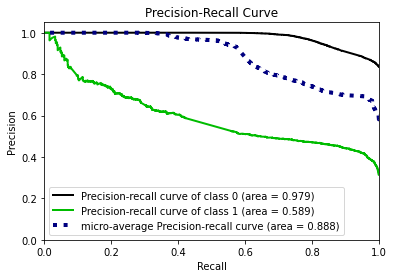

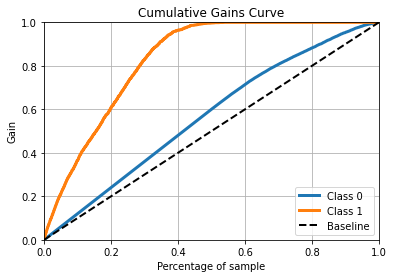

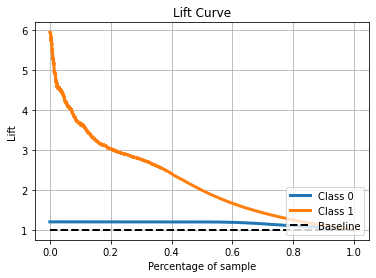

In [62]:
roc_auc_under,fpr_under,tpr_under , _ = balance_test(X_under, X_test, y_under, y_test)

Trainset number of observations: Counter({0: 6343, 1: 6343})
Test set target number of observations Counter({0: 7937, 1: 1602})
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      7937
           1       0.37      0.85      0.52      1602

    accuracy                           0.73      9539
   macro avg       0.66      0.78      0.67      9539
weighted avg       0.86      0.73      0.76      9539



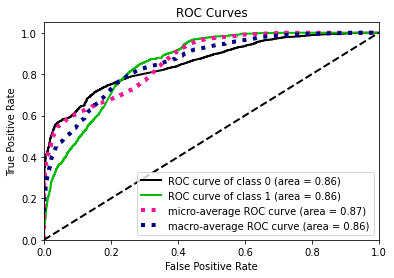

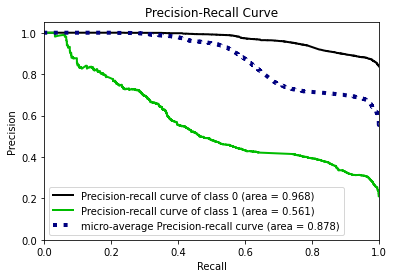

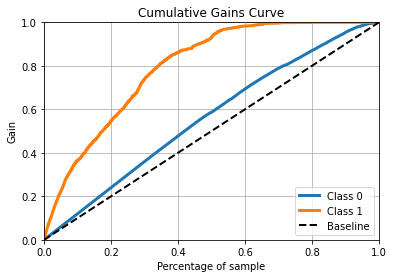

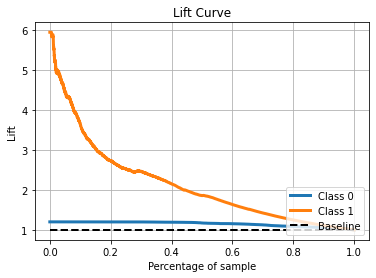

In [63]:
#Same analysis, using NearMiss
from imblearn.under_sampling import NearMiss

under_sampler = NearMiss()
X_under1, y_under1 = under_sampler.fit_resample(X_train, y_train)
print(f"Trainset number of observations: {Counter(y_under1)}")
print(f"Test set target number of observations {Counter(y_test)}")

roc_auc_under1,fpr_under1,tpr_under1, _  = balance_test(X_under1, X_test, y_under1, y_test)

In [64]:
#Using class_weight
n= Counter(y_train)
ratio = int(n[0]/n[1])
n

Counter({0: 31810, 1: 6343})

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      7937
           1       0.43      0.94      0.59      1602

    accuracy                           0.78      9539
   macro avg       0.71      0.84      0.72      9539
weighted avg       0.89      0.78      0.80      9539



ValueError: ignored

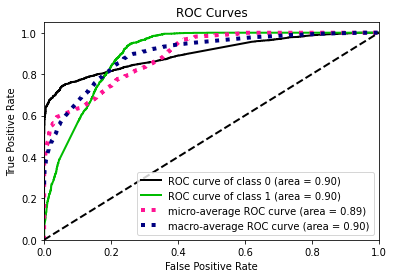

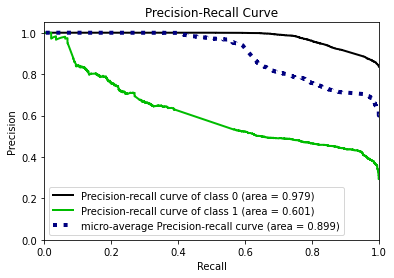

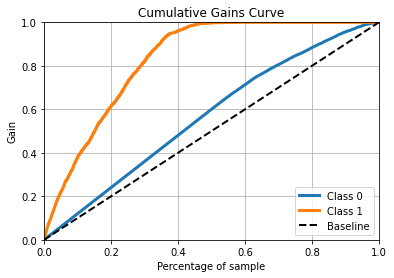

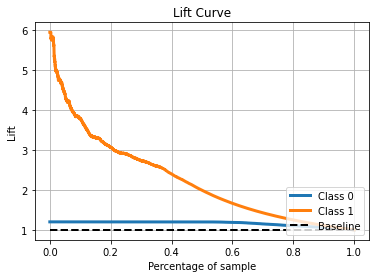

In [65]:
roc_auc_cw,fpr_cw,tpr_cw  = balance_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      7937
           1       0.43      0.94      0.59      1602

    accuracy                           0.78      9539
   macro avg       0.71      0.84      0.72      9539
weighted avg       0.89      0.78      0.80      9539

Best Treshold: 0.5043964571058211


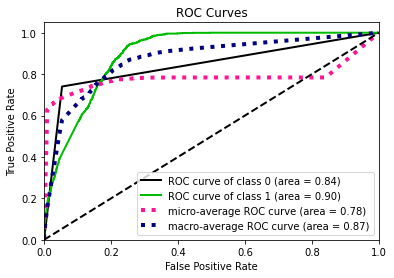

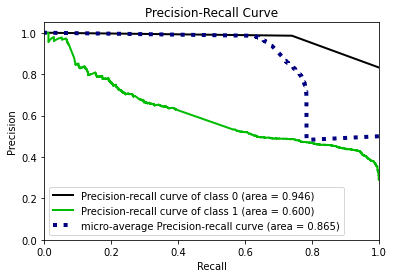

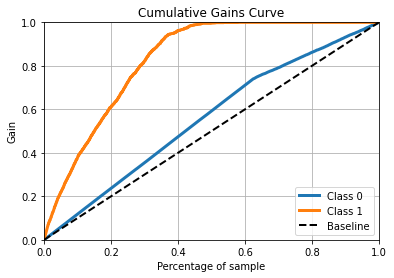

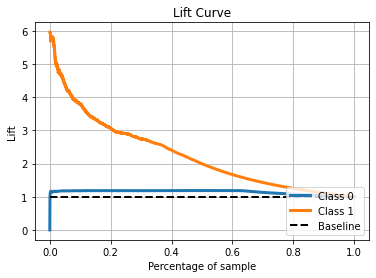

In [66]:
from numpy import argmax
roc_auc_t,fpr_t,tpr_t, thres = balance_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {thres}")

#Combination of tfidf and features


In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.head()

In [ ]:
df = pd.concat([X_tfidf_df,train_df], axis = 1)
print(df.shape)
df.head()

There are 6 main classes that we aim to predict and they are all evenly distributed in the dataset

In [18]:
train_df = df
y = train_df[['not_cyberbullying']]
X = train_df.drop(['not_cyberbullying','tweet_text'], axis = 1)

In [ ]:
X.head()

In [20]:
## the number of numerical features
num_features_count = 76

## extract the column names from the dataframe.
train_x_columns = list(X.columns)

##selecting which columns are categorical and which are numeric.
numerical_columns = train_x_columns[0:X.shape[1] - num_features_count]
categorical_columns = train_x_columns[:-num_features_count]

In [21]:
## splitting the training data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
## set this to true if transformations should be applied
transform = False

if transform == True:
    for k in numerical_columns:
        ## these parameter specify the skewness thresholds for transformations
        ## these were changed to investigate the impact
        skew_sqrt = 2
        skew_log = 5
        temp_skew = round(skew(X_train[k]),3)
        if temp_skew > skew_sqrt:
            X_train[k] = np.sqrt(X_train[k])
            trans_skew = round(skew(np.sqrt(X[k])),3)
        if temp_skew > skew_log:
            X_train[k] = np.log(1+X_train[k])
            trans_skew = round(skew(np.log(1+X_train[k])),3)
        else:
            trans_skew = temp_skew
        
        print(k, temp_skew, trans_skew)

## the results of the datatransformations had a neglible impact on the final results (f1 score incr of 0.02)
## as such, the transformations have not been considered further.

In [23]:
## selecting the features to use (numberic and categorical) - also seletcs how to fill in missing data and how to scale data
numeric_features = numerical_columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = categorical_columns

## how to handle missing data and also to use onehot encoder for categorical variables.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


## creating a preprocessor to combine the categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [24]:
def balance_test(X_train, X_test, y_train, y_test, class_weight = None, threshold=False):
    #Set the class weight
    if class_weight:    
        model = RandomForestClassifier(criterion = "gini", max_depth=25, min_samples_leaf = 1, 
                                       n_estimators=300, random_state=0, class_weight = class_weight, bootstrap=True, n_jobs=-1)
    else:
        model = RandomForestClassifier(criterion = "gini", max_depth=25, min_samples_leaf = 1, 
                                 n_estimators=300, random_state=0, class_weight = 'balanced_subsample', bootstrap=True, n_jobs=-1)
    #Train
    model.fit(X_train, y_train)

    #Test
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    # Plot metrics 
    plot_roc(y_test, y_score)
    #plt.show()
    
    plot_precision_recall(y_test, y_score)
    #plt.show()
    
    plot_cumulative_gain(y_test, y_score)
    #plt.show()
    
    plot_lift_curve(y_test, y_score)
    #plt.show()
    
    # Print a classification report
    print(classification_report(y_test,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

    print('Overall Precision score %s' % precision_score(y_test, y_pred))
    print('Overall Recall score %s' % recall_score(y_test, y_pred))
    print('Overall F1-score score %s' % f1_score(y_test, y_pred))
    print('Overall Accuracy score %s' % accuracy_score(y_test, y_pred))
        
    
    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.97      0.78      0.87      7937
           1       0.45      0.89      0.60      1602

    accuracy                           0.80      9539
   macro avg       0.71      0.83      0.73      9539
weighted avg       0.88      0.80      0.82      9539



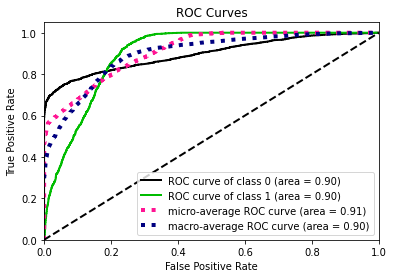

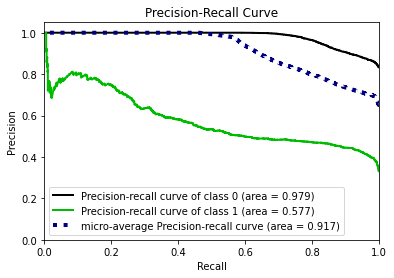

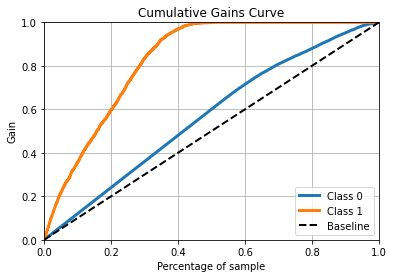

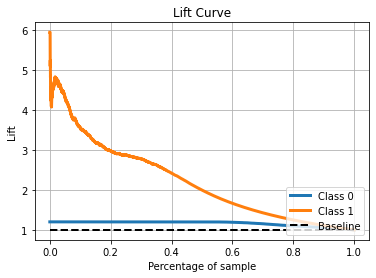

In [28]:
#Performance of imbalanced dataset
roc_auc_imb,fpr_imb,tpr_imb, _ = balance_test(X_train, X_test, y_train, y_test)

In [29]:
X=np.array(X)
train_y = np.array(y_train)
train_y = np.transpose(train_y)
train_y = train_y.ravel()

In [ ]:
#Oversampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=30)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
print(f"Trainset number of observations: {Counter(y_over)}")
print(f"Test set target number of observations: {Counter(y_test)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.98      0.76      0.86      7937
           1       0.44      0.92      0.59      1602

    accuracy                           0.79      9539
   macro avg       0.71      0.84      0.73      9539
weighted avg       0.89      0.79      0.81      9539



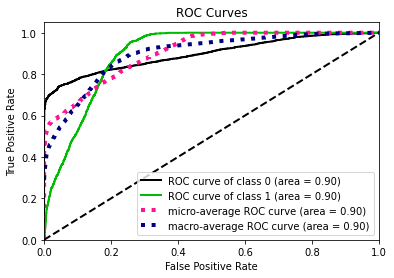

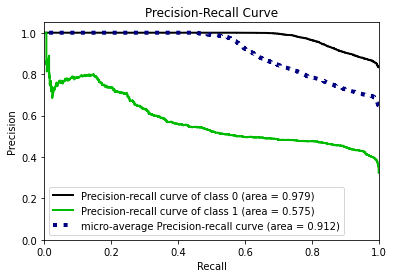

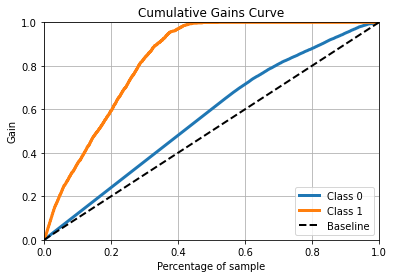

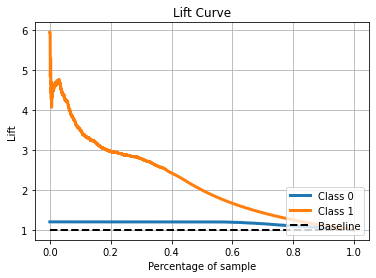

In [32]:
roc_auc_over,fpr_over,tpr_over, _ = balance_test(X_over, X_test, y_over, y_test)

In [33]:
#undersample the big dataset 
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
print(f"Trainset number of observations: {Counter(y_under)}")
print(f"Test set target number of observations: {Counter(y_test)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Trainset number of observations: Counter({'not_cyberbullying': 1})
Test set target number of observations: Counter({'not_cyberbullying': 1})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.99      0.72      0.83      7937
           1       0.41      0.97      0.57      1602

    accuracy                           0.76      9539
   macro avg       0.70      0.84      0.70      9539
weighted avg       0.89      0.76      0.79      9539



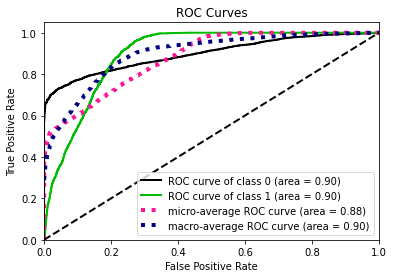

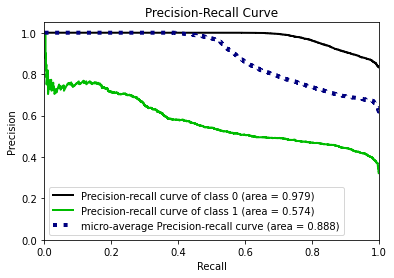

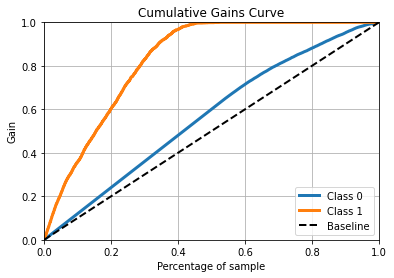

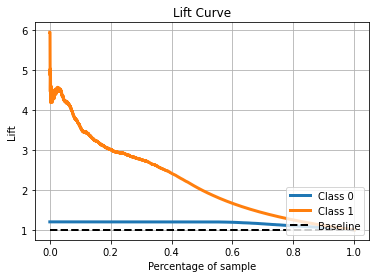

In [34]:
roc_auc_under,fpr_under,tpr_under , _ = balance_test(X_under, X_test, y_under, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Trainset number of observations: Counter({'not_cyberbullying': 1})
Test set target number of observations Counter({'not_cyberbullying': 1})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.83      0.31      0.45      7937
           1       0.17      0.69      0.27      1602

    accuracy                           0.37      9539
   macro avg       0.50      0.50      0.36      9539
weighted avg       0.72      0.37      0.42      9539



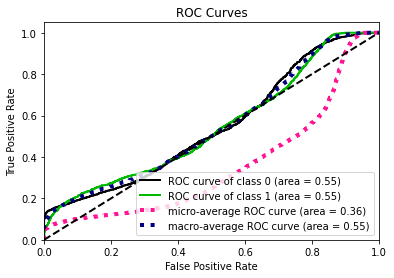

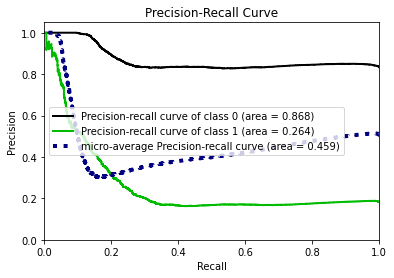

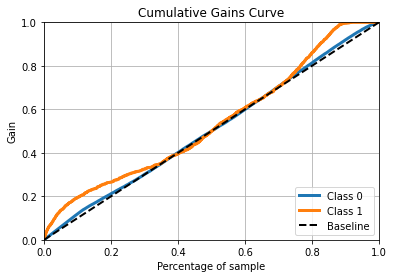

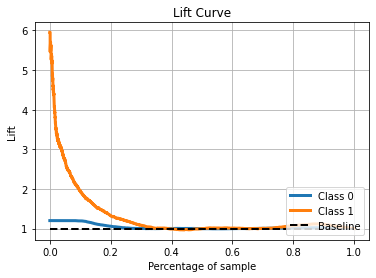

In [35]:
#Same analysis, using NearMiss
from imblearn.under_sampling import NearMiss

under_sampler = NearMiss()
X_under1, y_under1 = under_sampler.fit_resample(X_train, y_train)
print(f"Trainset number of observations: {Counter(y_under1)}")
print(f"Test set target number of observations {Counter(y_test)}")

roc_auc_under1,fpr_under1,tpr_under1, _  = balance_test(X_under1, X_test, y_under1, y_test)

In [46]:
#Using class_weight
n = Counter(y_train)
ratio = int(n[0]/n[1])

ZeroDivisionError: ignored

In [50]:
y_train.value_counts()
ratio = int(31810/6343)
ratio

5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.97      0.78      0.87      7937
           1       0.45      0.89      0.60      1602

    accuracy                           0.80      9539
   macro avg       0.71      0.83      0.73      9539
weighted avg       0.88      0.80      0.82      9539



ValueError: ignored

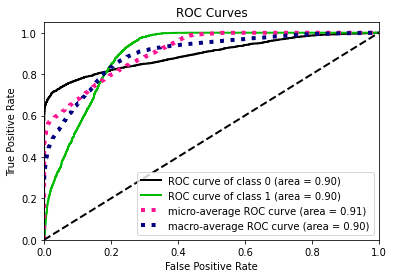

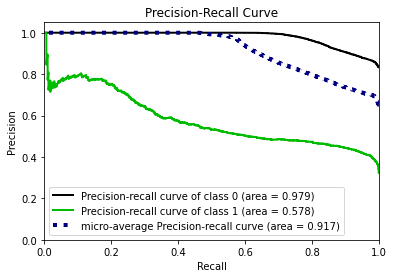

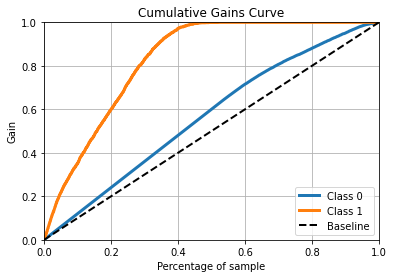

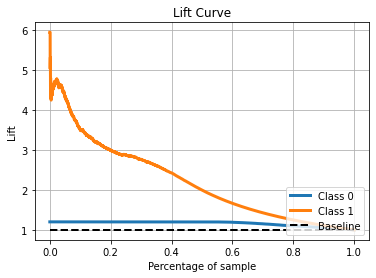

In [51]:
roc_auc_cw,fpr_cw,tpr_cw  = balance_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.97      0.78      0.87      7937
           1       0.45      0.89      0.60      1602

    accuracy                           0.80      9539
   macro avg       0.71      0.83      0.73      9539
weighted avg       0.88      0.80      0.82      9539

Best Treshold: 0.4385340496069113


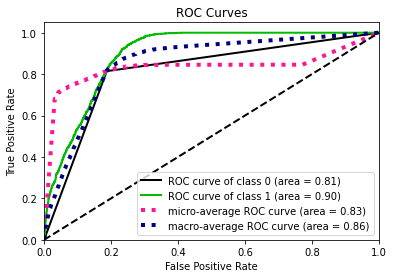

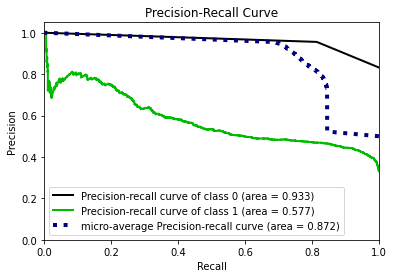

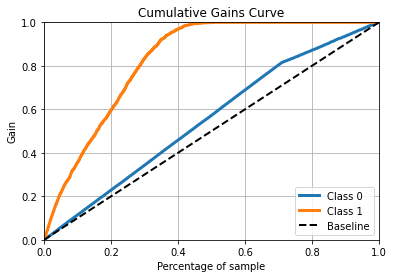

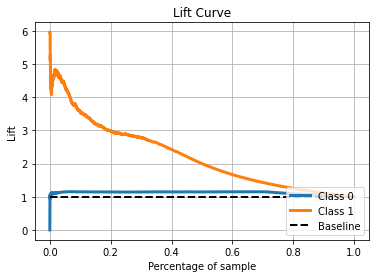

In [52]:
from numpy import argmax
roc_auc_t,fpr_t,tpr_t, thres = balance_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {thres}")

# Results briefly


It seems that balancing techniques are not improving our Random Forest model, as only if we set the class_weight the model get the same reuslt as before (it is the same as just setting class_weight = balanced), and the rest of the techniques worsen the model. The most extreme case is under sampling with NearMiss that results in a really bad accuracy (almost 0.4)


